In [1]:
import os
import pickle
from helper_fxns import create_trace_matrix
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import corner

/Library/Python/2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Library/Python/2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
d = 100
A = .5 * np.identity(d) + .5 * np.ones((d,d))
C = np.zeros((d,d))
for i in range(d):
    for j in range(d):
        C[i][j] = A[i][j] * np.sqrt((i+1)*(j+1))

invC = np.linalg.inv(C)
mu = np.zeros(d)

In [3]:
os.chdir('/Users/Erin/git/moo_and_mcmc/pymc/dream_test_examples/ndim_gaussian/')

In [4]:
trace = pickle.load(open('2015_10_20_ndim_gaussian_mtdreamzs.p'))

In [7]:
params_1 = trace['params'][0][50000-1]

In [8]:
-.5*np.sum(params_1*np.dot(invC, params_1))

6.649481819925385e+17

In [5]:
chain_list = chain_list = [trace['params'][j][25000::10] for j in range(len(trace['params']))]

In [6]:
draws = np.concatenate(chain_list)

In [7]:
subset_draws = draws[:,:20]

In [8]:
subset_draws.shape

(7500, 20)

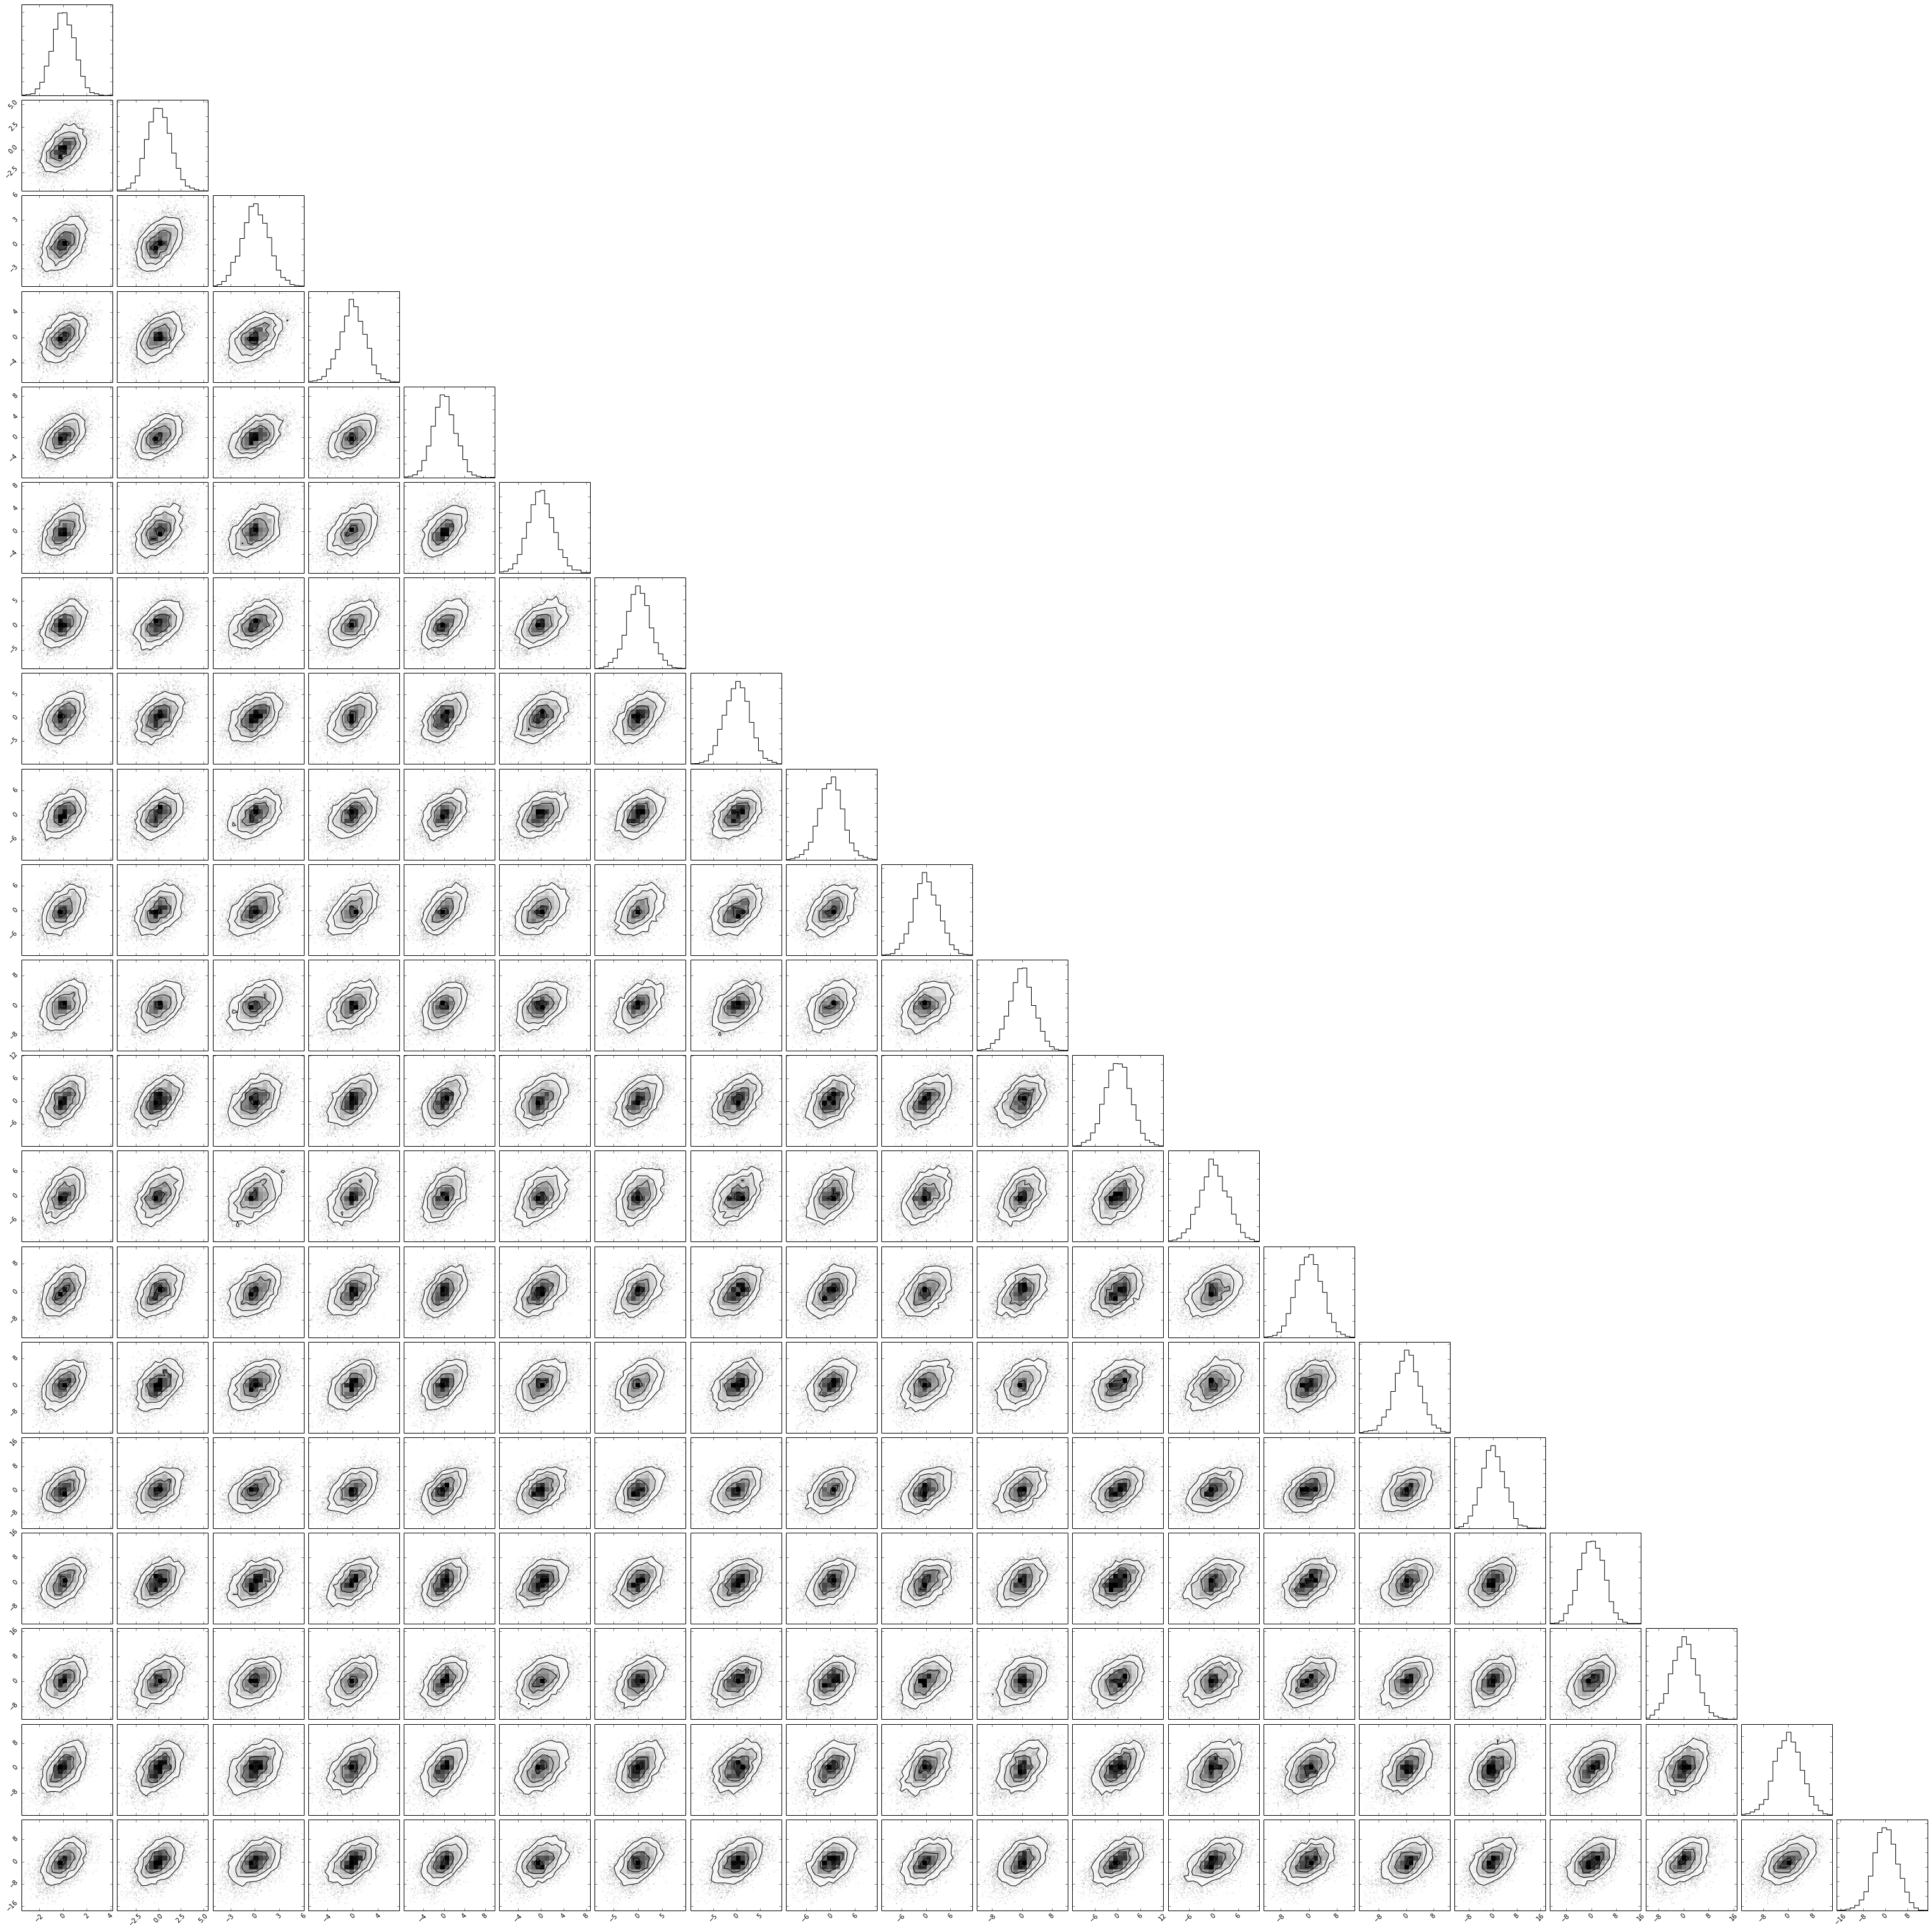

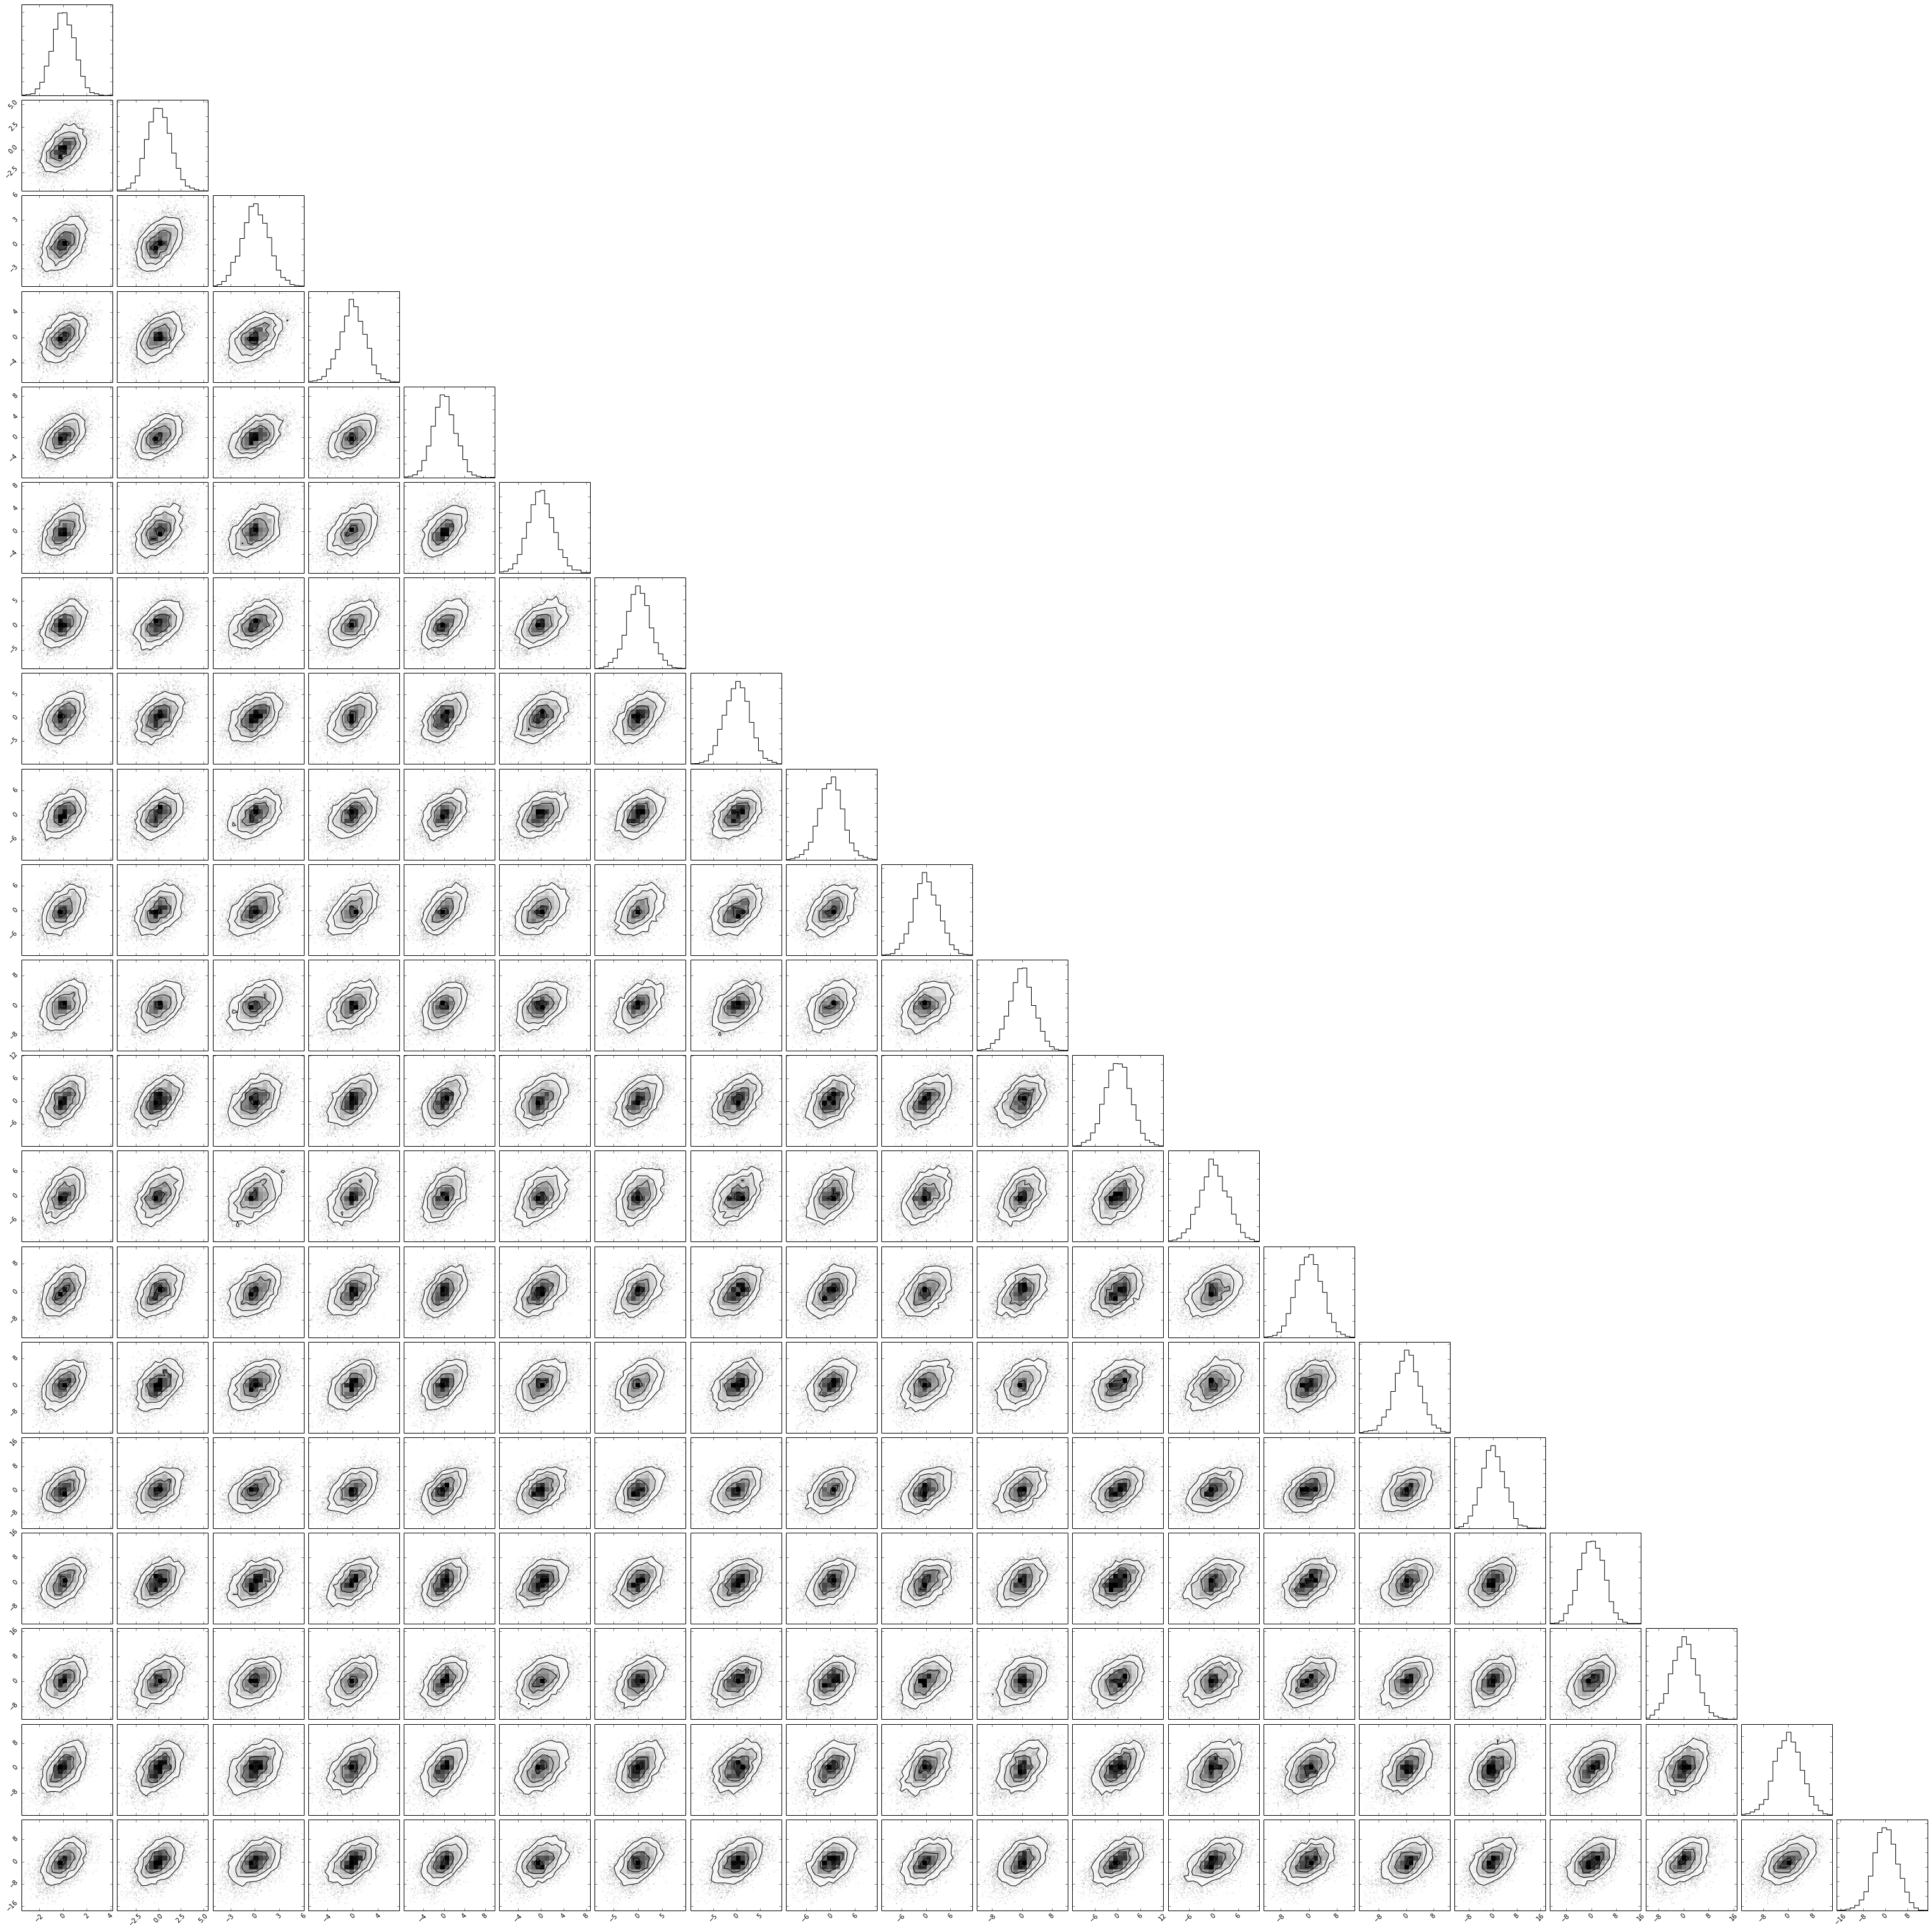

In [9]:
corner.corner(subset_draws)

In [16]:
weights = np.ones_like(draws[:,dim])/len(draws[:,dim])

In [17]:
weights

array([ 0.00013333,  0.00013333,  0.00013333, ...,  0.00013333,
        0.00013333,  0.00013333])

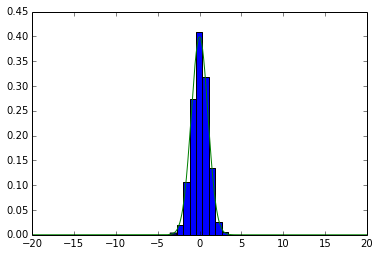

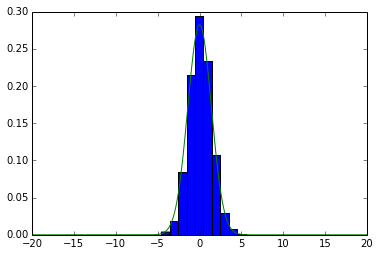

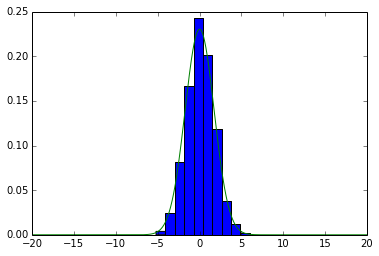

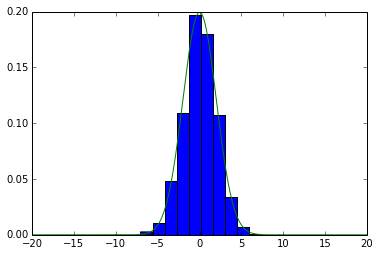

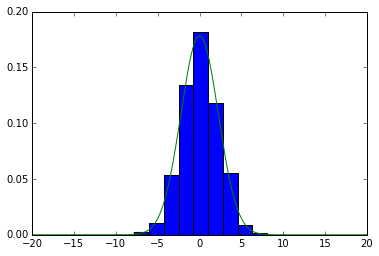

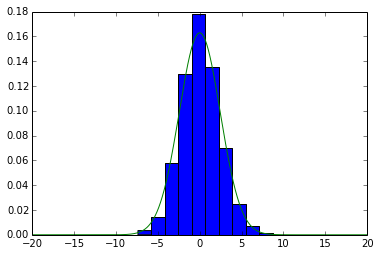

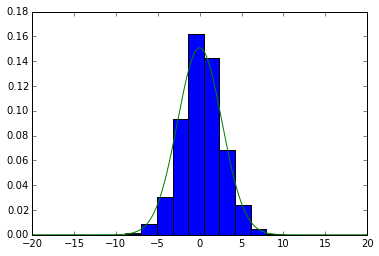

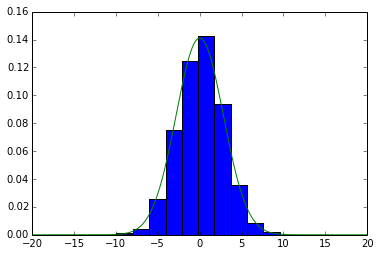

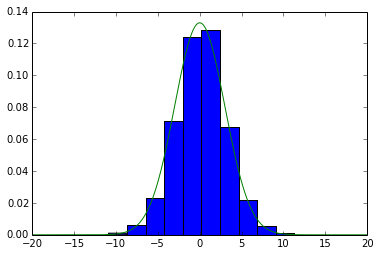

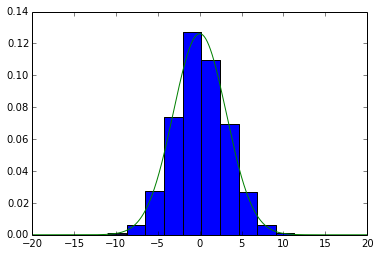

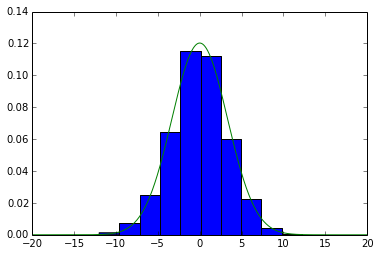

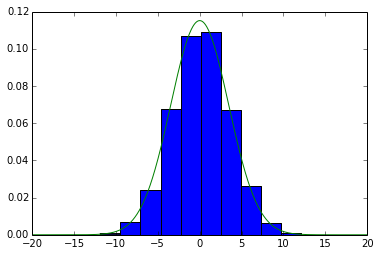

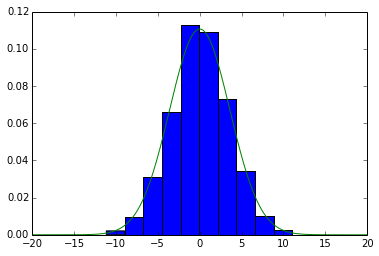

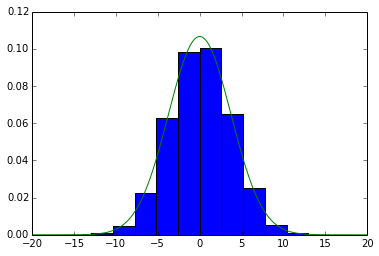

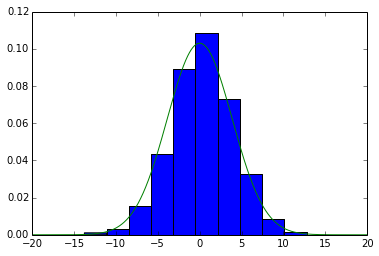

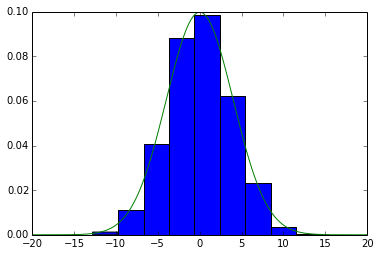

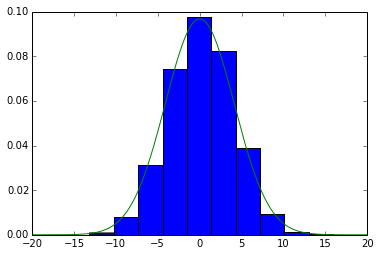

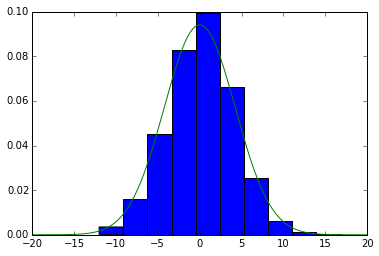

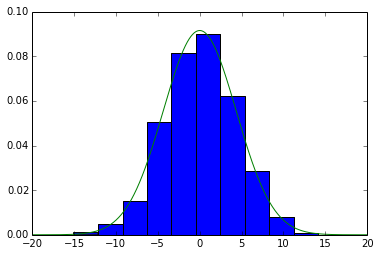

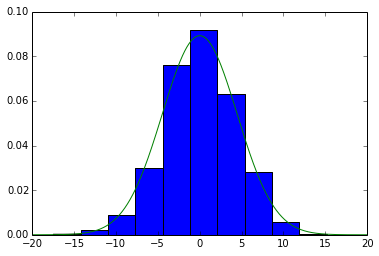

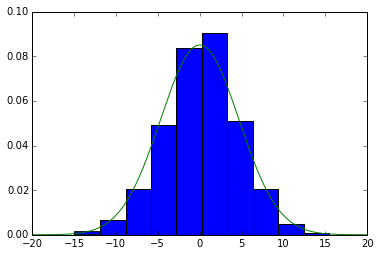

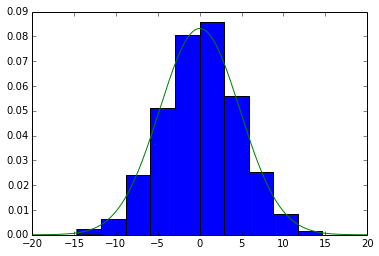

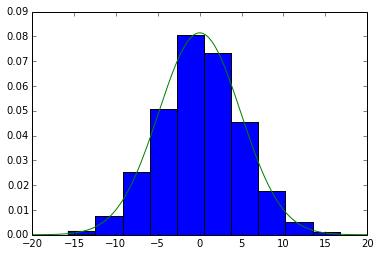

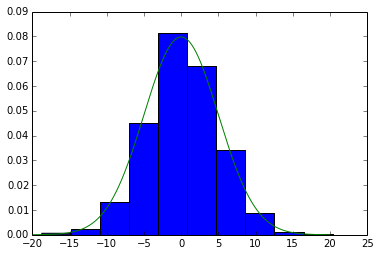

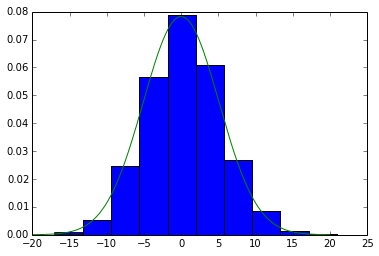

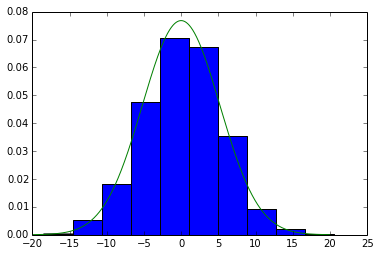

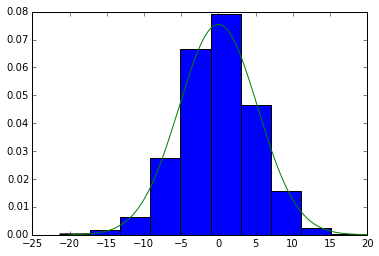

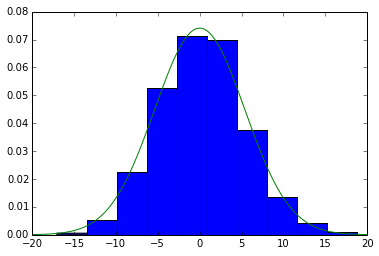

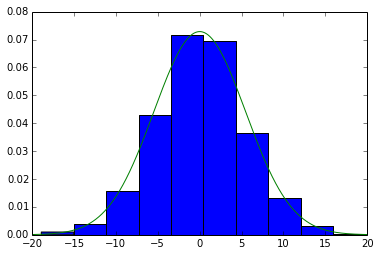

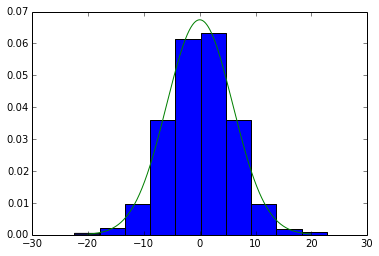

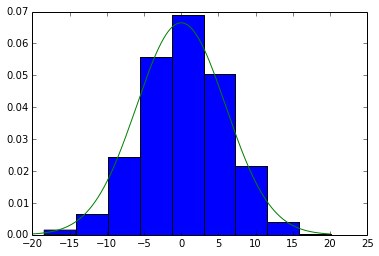

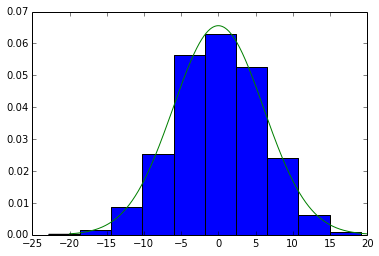

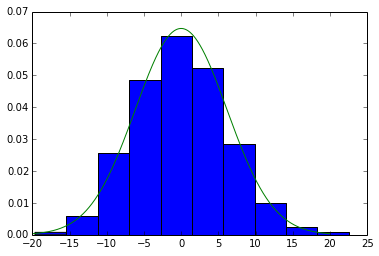

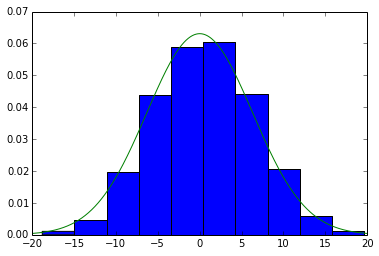

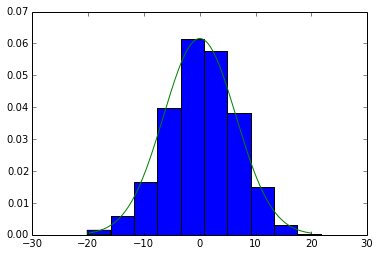

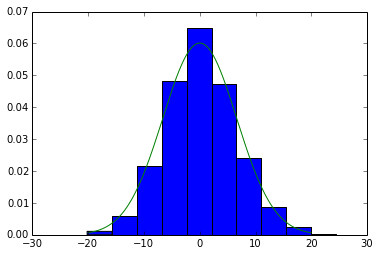

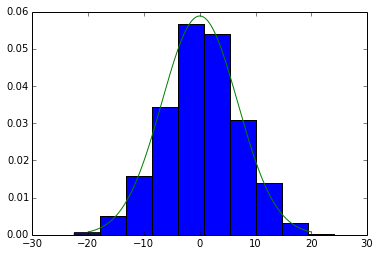

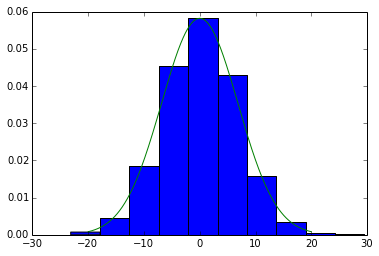

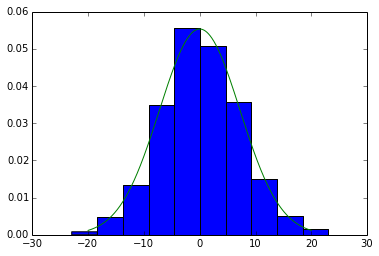

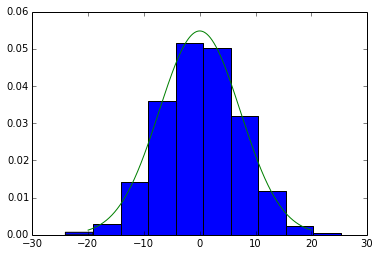

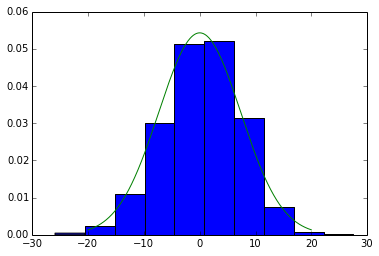

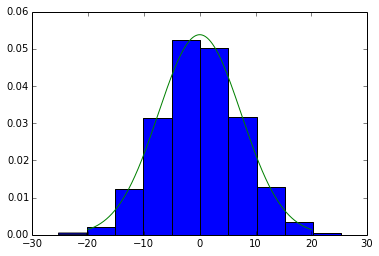

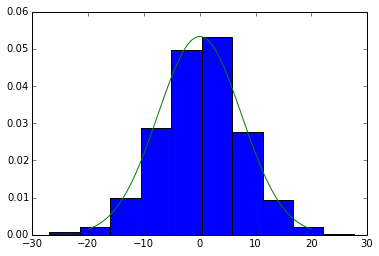

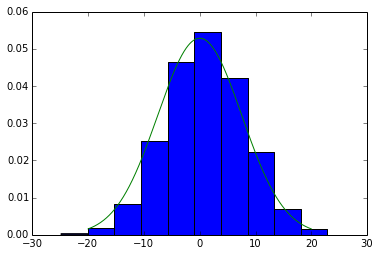

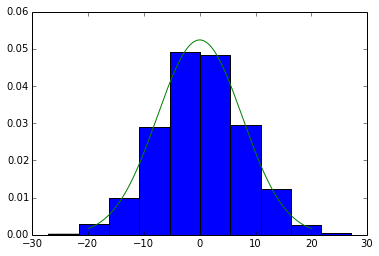

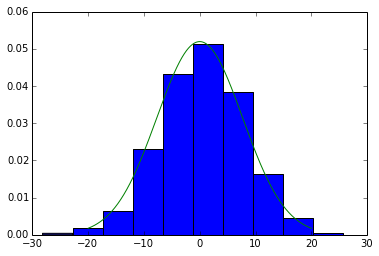

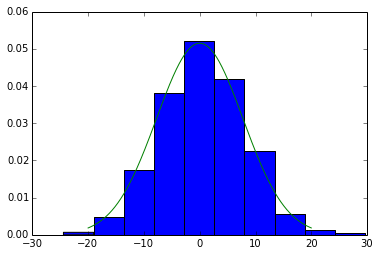

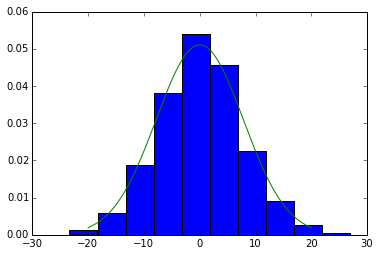

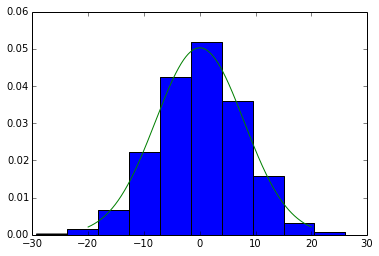

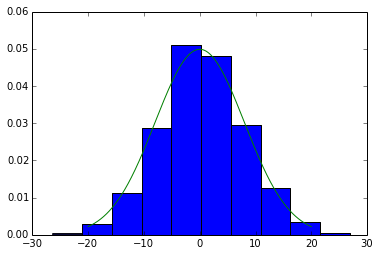

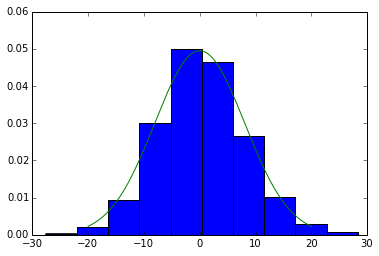

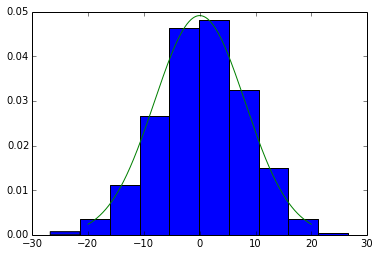

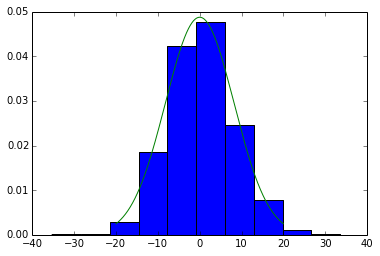

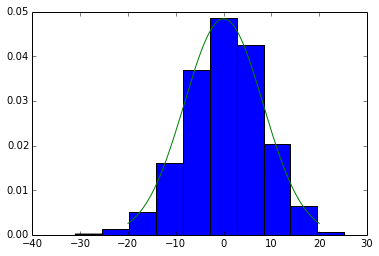

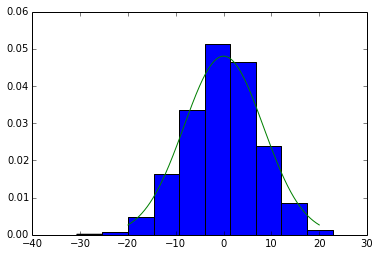

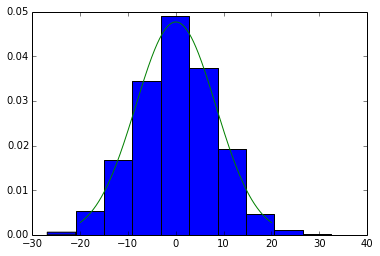

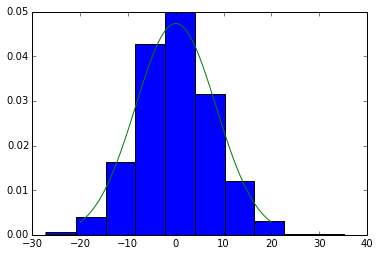

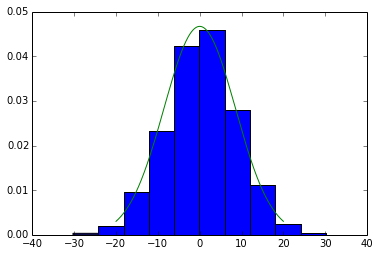

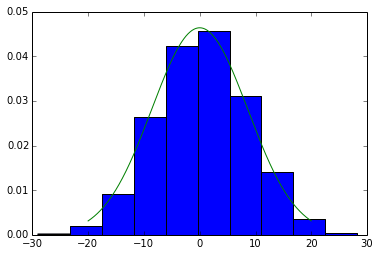

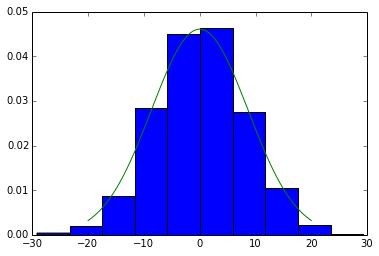

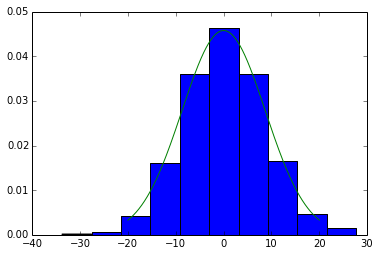

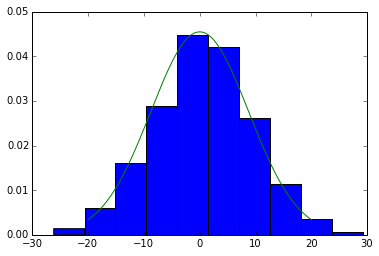

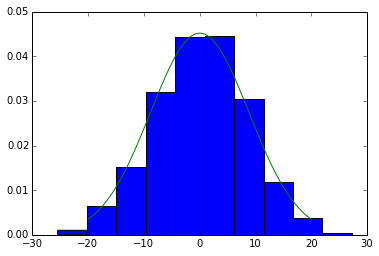

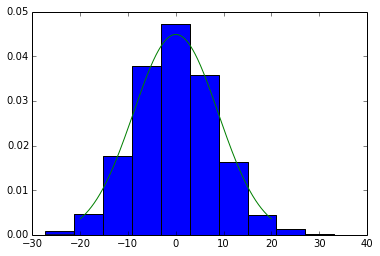

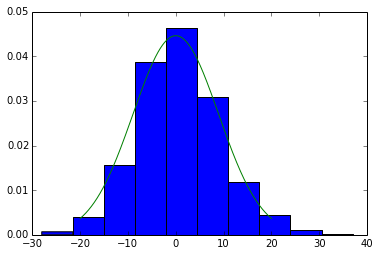

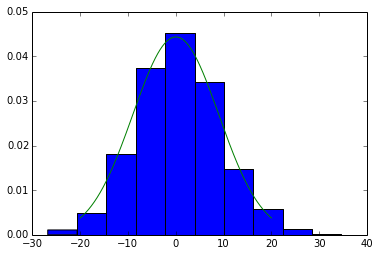

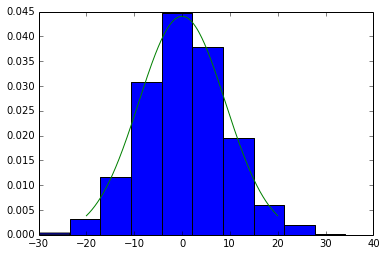

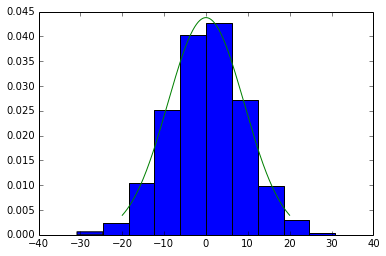

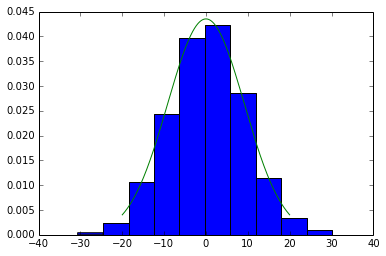

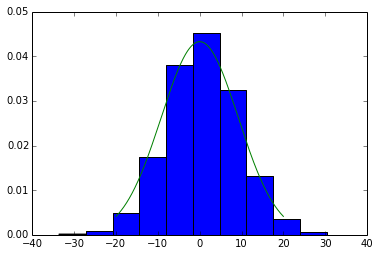

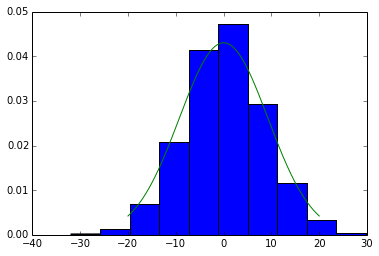

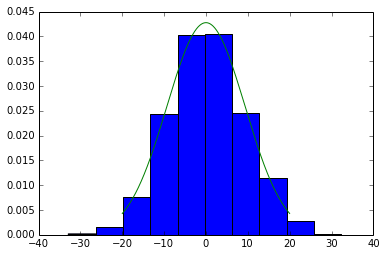

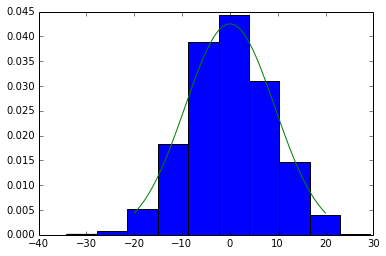

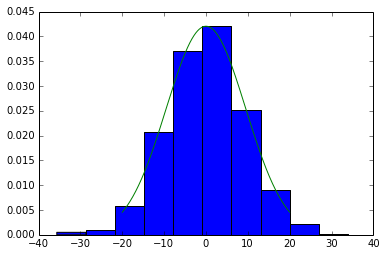

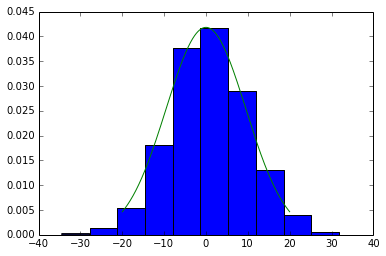

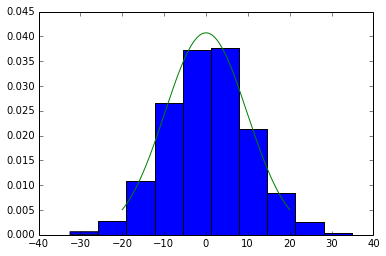

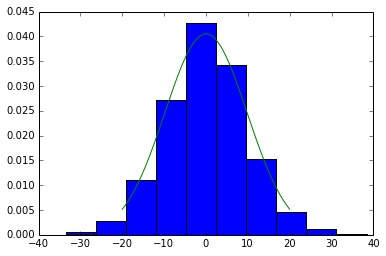

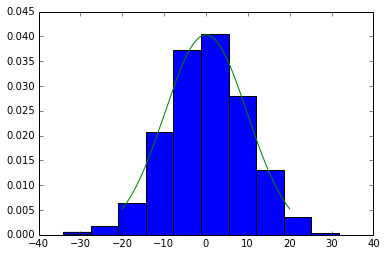

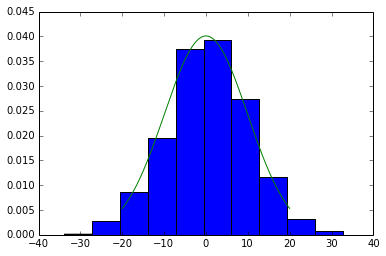

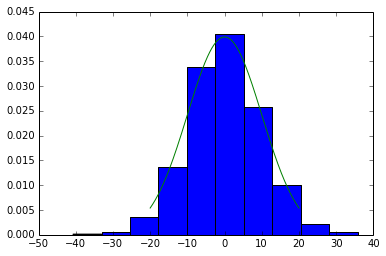

In [18]:
for dim in range(len(draws[0])):
    plt.figure()
    weights = np.ones_like(draws[:,dim])/len(draws[:,dim])
    plt.hist(draws[:,dim], normed=True)
    #xmin, xmax = plt.xlim()
    vals = np.arange(-20, 20, .01)
    sd = np.sqrt(C[dim][dim])
    plt.plot(vals, norm.pdf(vals,0, sd))